<a href="https://colab.research.google.com/github/rlatndnd9804/pdm03/blob/main/notebook/chap06_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chap06-MLP

## Activation functions
- step()
- sigmoid()
- tanh()
- relu()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


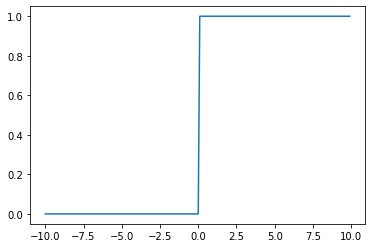

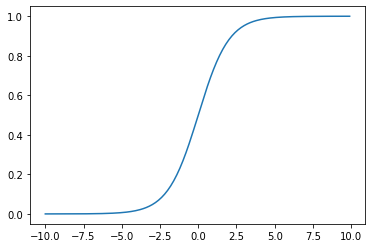

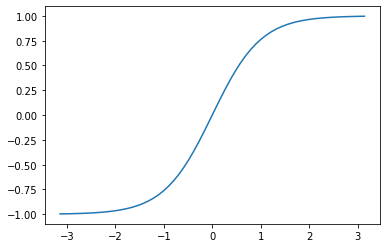

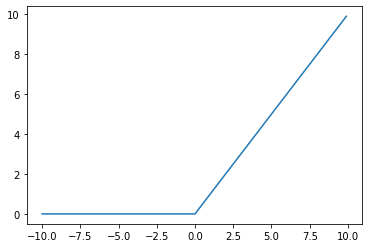

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
	result = x > 0.000001		# True 또는 False 
	return result.astype(np.int)	# 정수로 반환


x = np.arange(-10.0, 10.0, 0.1)
y = step(x)
plt.plot(x, y)
plt.show()


# import numpy as np
# import matplotlib.pyplot as plt

def sigmoid(x):
	return 1.0 / (1.0 + np.exp(-x)) 

x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# import numpy as np 
# import matplotlib.pyplot as plt 
  
x = np.linspace(-np.pi, np.pi, 60) 
y = np.tanh(x) 
plt.plot(x, y) 
plt.show() 

# import numpy as np 
# import matplotlib.pyplot as plt 

def relu(x):
	return np.maximum(x, 0)
  
x = np.arange(-10.0, 10.0, 0.1)
y = relu(x)
plt.plot(x, y) 
plt.show() 

# Ref.
# https://www.v7labs.com/blog/neural-networks-activation-functions
#

## MLP : 순방향 연산

In [1]:
import numpy as np

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate=0.2

# 훈련 샘플과 정답 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

W1 = np.array([[0.10, 0.20],
                 [0.30, 0.40]])
W2 = np.array([[0.50], [0.60]])
B1 = np.array([0.1, 0.2])
B2 = np.array([0.3])   

################################################
# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2

def test():
    for x, y in zip(X, T):
        # print(x.shape)
        x = np.reshape(x, (1, -1))	# x를 2차원 행렬로 만든다.입력은 2차원이어야 한다.
        # print(x.shape)
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

test()    
###############################################


[[0 0]] [0] [[0.70938314]]
[[0 1]] [1] [[0.72844306]]
[[1 0]] [1] [[0.71791234]]
[[1 1]] [0] [[0.73598705]]


## 손실함수 계산

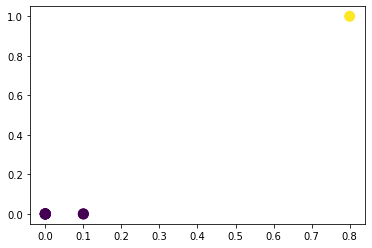

0.029999999999999992


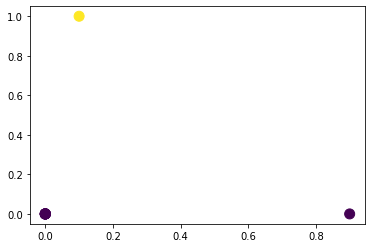

0.81
1.0
0.0


In [2]:
import numpy as np
import matplotlib.pylab as plt

def MSE(target, y):
	return 0.5 * np.sum((y-target)**2)

y = np.array([ 0.0, 0.0, 0.8, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0 ])
target = np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])
plt.scatter(y, target, c=target, s=100)
plt.show()
print(MSE(target, y))

target = np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])
y = np.array([ 0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ] )
plt.scatter(y, target, c=target, s=100)
plt.show()
print(MSE(target, y))



### MSE=0.0 과 MSE = 1.0 비교

In [3]:
#[DIY] NSE = 0, 1을 비교
#MSE = 1.0
y = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0 ])
target = np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])
print(MSE(target, y))
#MSE = 0.0
y = np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])
target = np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])
print(MSE(target, y))
 

1.0
0.0


## 경사하강법
- f(x) = (x-3)**2 + 10
 * x = 가중치
 * f(x) = 손실함수 

손실함수값( 7.199999999999999 )= 27.639999999999993
손실함수값( 5.52 )= 16.350399999999997
손실함수값( 4.512 )= 12.286143999999998
손실함수값( 3.9071999999999996 )= 10.82301184
손실함수값( 3.54432 )= 10.2962842624
손실함수값( 3.3265919999999998 )= 10.106662334464
손실함수값( 3.1959551999999998 )= 10.03839844040704
손실함수값( 3.11757312 )= 10.013823438546535
손실함수값( 3.070543872 )= 10.004976437876753
손실함수값( 3.0423263232 )= 10.001791517635631
손실함수값( 3.02539579392 )= 10.000644946348826
손실함수값( 3.015237476352 )= 10.000232180685577
손실함수값( 3.0091424858112 )= 10.000083585046807
손실함수값( 3.00548549148672 )= 10.000030090616852
손실함수값( 3.003291294892032 )= 10.000010832622067
손실함수값( 3.0019747769352194 )= 10.000003899743945
손실함수값( 3.0011848661611316 )= 10.00000140390782
손실함수값( 3.000710919696679 )= 10.000000505406815
손실함수값( 3.0004265518180073 )= 10.000000181946453
손실함수값( 3.0002559310908046 )= 10.000000065500723
손실함수값( 3.0001535586544827 )= 10.00000002358026
손실함수값( 3.0000921351926895 )= 10.000000008488893
손실함수값( 3.0000552811156136 )= 10.000000

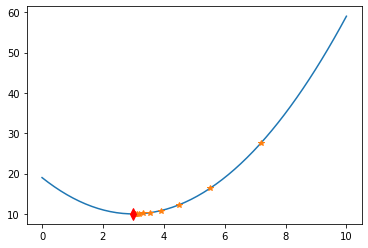

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = 10  
learning_rate = 0.2  
precision = 0.00001  
max_iterations = 100

# 손실함수를 람다식으로 정의한다. 
loss_func = lambda x: (x-3)**2 + 10

# 그래디언트를 람다식으로 정의한다. 손실함수의 1차 미분값이다. 
gradient = lambda x: 2*x-6

list1 = []
list2 = []

# 그래디언트 강하법
for i in range(max_iterations):
    x = x - learning_rate * gradient(x)
    list1.append(x)
    list2.append(loss_func(x))
    print("손실함수값(", x, ")=", loss_func(x))

print("최소값 = ", x)

x1 = np.linspace(0.0, 10.0)
y1 = loss_func(x1)
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x1,y1)  # Plot some data on the axes.
ax.plot(list1,list2, '*')  # Plot some data on the axes.
min_loss_idx = np.argmin(list2)
ax.plot(list1[min_loss_idx],list2[min_loss_idx], 'rd', ms=8)
plt.show()


## 2차원 경사하강법
- 가중치가 2개일 경우

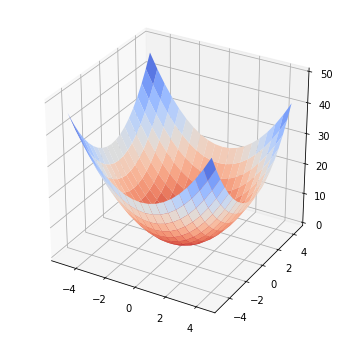

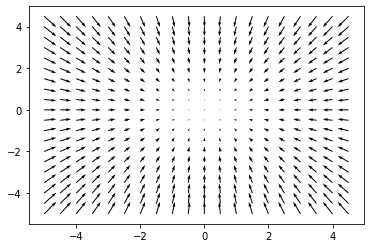

In [5]:
# from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)	# 참고 박스
Z = X**2 +Y**2			# 넘파이 연산

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# 3차원 그래프를 그린다. 
ax.plot_surface(X, Y, Z, cmap='coolwarm_r')
plt.show()

######################################
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.5)
X, Y = np.meshgrid(x,y)
U = -2*X
V = -2*Y

plt.figure()
Q = plt.quiver(X, Y, U, V, units='width')
plt.show()

## XOR 해결 => 가중치 계산
- 순방향 연산
- 역방향 전사

> 9개의 가중치를 back-propagation 으로 찾아냄.

In [6]:
import numpy as np

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate=0.2

# 훈련 샘플과 정답
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

W1 = np.array([[0.10,0.20], [0.30,0.40]])
W2 = np.array([[0.50],[0.60]])
B1 = np.array([0.1, 0.2])
B2 = np.array([0.3])   

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2

# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2		# 우리는 외부에 정의된 변수를 변경해야 한다. 
    for i in range(90000):		# 9만번 반복한다. 
        for x, y in zip(X, T):		# 학습 샘플을 하나씩 꺼낸다. 
            x = np.reshape(x, (1, -1))	# 2차원 행렬로 만든다. ①
            y = np.reshape(y, (1, -1))	# 2차원 행렬로 만든다. 

            layer0, layer1, layer2 = predict(x)			# 순방향 계산
            layer2_error = layer2-y				# 오차 계산
            layer2_delta = layer2_error*actf_deriv(layer2)	# 출력층의 델타 계산 
            layer1_error = np.dot(layer2_delta, W2.T)		# 은닉층의 오차 계산 ②
            layer1_delta = layer1_error*actf_deriv(layer1)	# 은닉층의 델타 계산 ③
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)	# ④
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)	# 
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)	# ⑤
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)	# 

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))	# 하나의 샘플을 꺼내서 2차원 행렬로 만든다. 
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)		# 출력층의 값을 출력해본다. 
        
fit()
test()
#########################
print(W1)
print(W2)
print(B1,B2)


[[0 0]] [0] [[0.00814407]]
[[0 1]] [1] [[0.99154105]]
[[1 0]] [1] [[0.99152258]]
[[1 1]] [0] [[0.01038517]]
[[-6.7181009  -5.22651178]
 [-6.75291089 -5.23369975]]
[[-11.19451524]
 [ 11.04437812]]
[2.8151334  7.80251731] [-5.28026114]
